In [7]:
from habanero import Crossref
from pprint import pprint
cr = Crossref(mailto = "htw2116@columbia.edu")

In [8]:
n = 50
journal_ISSN = "1471-2105"
journal_papers = cr.journals(ids = journal_ISSN, works = True, limit = n)

In [9]:
for paper in journal_papers["message"]["items"]:
    print("Title: " + paper["title"][0])
    print("DOI: " + paper["DOI"])
    first_author = None
    for author in paper["author"]:
        if author["sequence"] == "first":
            first_author = author["given"] + " " + author["family"]
            break
    print("First Author: " + first_author)

Title: A graph theoretic approach to utilizing protein structure to identify non-random somatic mutations
DOI: 10.1186/1471-2105-15-86
First Author: Gregory A Ryslik
Title: Utilizing protein structure to identify non-random somatic mutations
DOI: 10.1186/1471-2105-14-190
First Author: Gregory A Ryslik
Title: Leveraging protein quaternary structure to identify oncogenic driver mutations
DOI: 10.1186/s12859-016-0963-3
First Author: Gregory A. Ryslik
Title: A spatial simulation approach to account for protein structure when identifying non-random somatic mutations
DOI: 10.1186/1471-2105-15-231
First Author: Gregory A Ryslik
Title: eNetXplorer: an R package for the quantitative exploration of elastic net families for generalized linear models
DOI: 10.1186/s12859-019-2778-5
First Author: Julián Candia
Title: Effect of stochasticity on coinfection dynamics of respiratory viruses
DOI: 10.1186/s12859-019-2793-6
First Author: Lubna Pinky
Title: ProPhylo: partial phylogenetic profiling to guide 

In [10]:
from graph_tool.all import *

journal_graph = Graph()
vertex_id = journal_graph.new_vertex_property("string")

journal_root = journal_graph.add_vertex()
vertex_id[journal_root] = journal_ISSN

for paper in journal_papers["message"]["items"]:
    paper_vertex = journal_graph.add_vertex()
    vertex_id[paper_vertex] = paper["DOI"]
    journal_graph.add_edge(paper_vertex, journal_root)

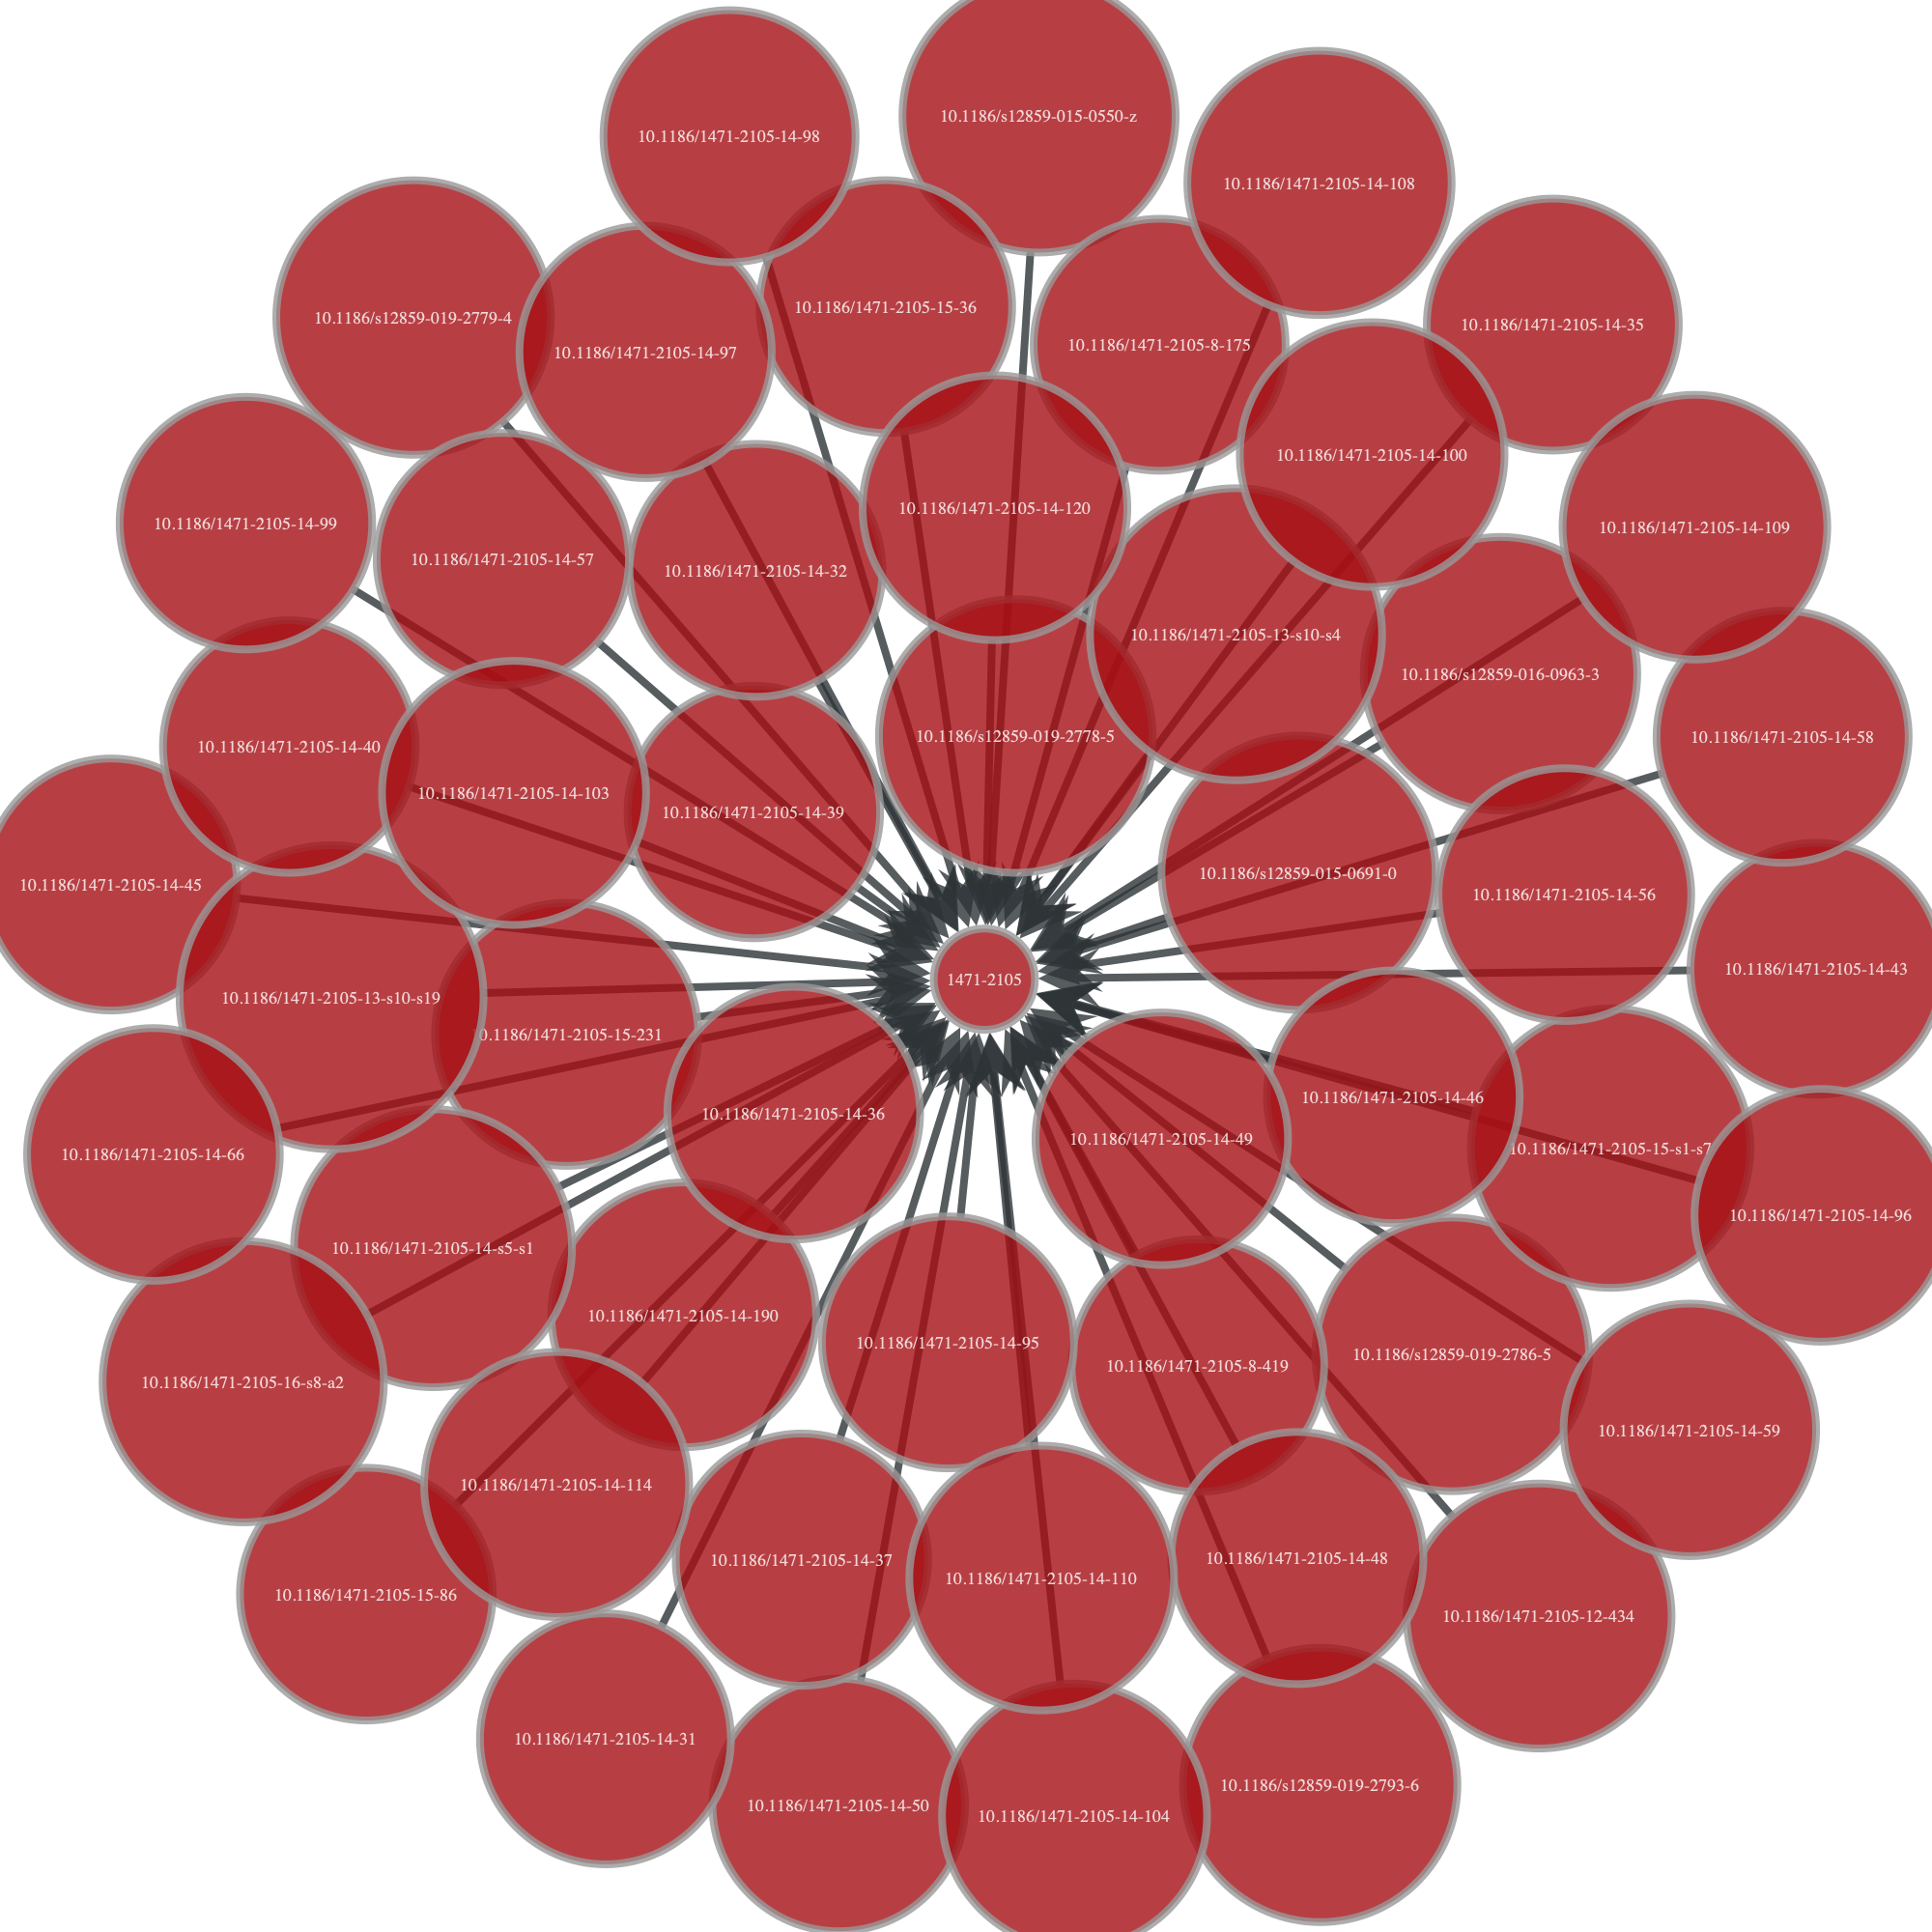

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1064a9160, at 0x1064a9390>

In [11]:
journal_graph.vp.id = vertex_id
graph_draw(journal_graph, vertex_text = journal_graph.vp.id, 
           output_size = (2000,2000), vertex_font_size = 18, 
           bg_color = [1,1,1,1], inline = True)

In [21]:
item = cr.works(ids = "10.1186/s12859-019-2778-5")
pprint(item)

{'message': {'DOI': '10.1186/s12859-019-2778-5',
             'ISSN': ['1471-2105'],
             'URL': 'http://dx.doi.org/10.1186/s12859-019-2778-5',
             'alternative-id': ['2778'],
             'article-number': '189',
             'assertion': [{'group': {'label': 'Article History',
                                      'name': 'ArticleHistory'},
                            'label': 'Received',
                            'name': 'received',
                            'order': 1,
                            'value': '5 November 2018'},
                           {'group': {'label': 'Article History',
                                      'name': 'ArticleHistory'},
                            'label': 'Accepted',
                            'name': 'accepted',
                            'order': 2,
                            'value': '25 March 2019'},
                           {'group': {'label': 'Article History',
                                      'name': 'ArticleH

In [32]:
item = cr.works(ids = "10.1186/1471-2105-14-190")
item["message"]["reference"]

[{'issue': '8',
  'key': '5935_CR1',
  'doi-asserted-by': 'publisher',
  'first-page': '789',
  'DOI': '10.1038/nm1087',
  'volume': '10',
  'author': 'B Vogelstein',
  'year': '2004',
  'unstructured': 'Vogelstein B, Kinzler KW: Cancer genes and the pathways they control. Nat Med. 2004, 10 (8): 789-799. 10.1038/nm1087. [\n                    http://www.ncbi.nlm.nih.gov/pubmed/15286780\n                    \n                  ] [PMID: 15286780]',
  'journal-title': 'Nat Med'},
 {'issue': '7132',
  'key': '5935_CR2',
  'doi-asserted-by': 'publisher',
  'first-page': '153',
  'DOI': '10.1038/nature05610',
  'volume': '446',
  'author': 'C Greenman',
  'year': '2007',
  'unstructured': 'Greenman C, Stephens P, Smith R, Dalgliesh GL, Hunter C, Bignell G, Davies H, Teague J, Butler A, Stevens C, Edkins S, O’Meara S, Vastrik I, Schmidt EE, Avis T, Barthorpe S, Bhamra G, Buck G, Choudhury B, Clements J, Cole J, Dicks E, Forbes S, Gray K, Halliday K, Harrison R, Hills K, Hinton J, Jenkinson A,

In [27]:
cr.works(query = "ecology", select = ["DOI", "reference"])

{'status': 'ok',
 'message-type': 'work-list',
 'message-version': '1.0.0',
 'message': {'facets': {},
  'total-results': 349940,
  'items': [{'DOI': '10.1007/springerreference_29611'},
   {'DOI': '10.1002/ecy.1807'},
   {'DOI': '10.2307/1928969'},
   {'DOI': '10.2307/1930158'},
   {'DOI': '10.2307/1931096'},
   {'DOI': '10.2307/1929908'},
   {'DOI': '10.2307/1943146'},
   {'DOI': '10.2307/1934287'},
   {'DOI': '10.2307/1935066'},
   {'DOI': '10.5040/9781474274685.ch-009'},
   {'DOI': '10.1002/9781444341966.ch14'},
   {'DOI': '10.1002/9780470979365.ch7'},
   {'DOI': '10.1002/9780470979365.ch2'},
   {'DOI': '10.1002/9780470979365.ch1'},
   {'DOI': '10.1002/9781118015841.ch5'},
   {'DOI': '10.4996/fireecology'},
   {'DOI': '10.5402/ecology'},
   {'DOI': '10.1155/8641'},
   {'DOI': '10.9774/gleaf.978-1-909493-30-8_29'},
   {'DOI': '10.1093/beheco/arq172'}],
  'items-per-page': 20,
  'query': {'start-index': 0, 'search-terms': 'ecology'}}}